In [2]:
#PART A - TIME SERIES ANALYSIS

#installing pmdarima library that is used for time series.
!pip install pmdarima 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
# Load the csv table data
monthly_data = pd.read_csv("C:\\Users\\aksha\\PERSONAL\\DATA_ANALYTICS\\STATI\\nitm18442004.csv")
yearly_data = pd.read_csv("C:\\Users\\aksha\\PERSONAL\\DATA_ANALYTICS\\STATI\\nity18442004.csv") 

In [6]:
#PRELIMANARY ASSESSMENT

# Previewing the loaded data
print(monthly_data.head())
print(yearly_data.head()) 

      x
0   4.5
1   2.4
2   4.8
3   9.1
4  10.9
     x
0  8.5
1  8.3
2  9.7
3  8.9
4  8.5


In [11]:
#Analysing monthly data
monthly_data.describe() 

,x
count,1932.000000
mean,8.500776
std,3.825564
min,-0.900000
25%,5.300000
50%,8.200000
75%,12.100000
max,17.200000


In [12]:
yearly_data.describe() 

,x
count,161.000000
mean,8.488820
std,0.525475
min,6.700000
25%,8.200000
50%,8.500000
75%,8.800000
max,9.700000


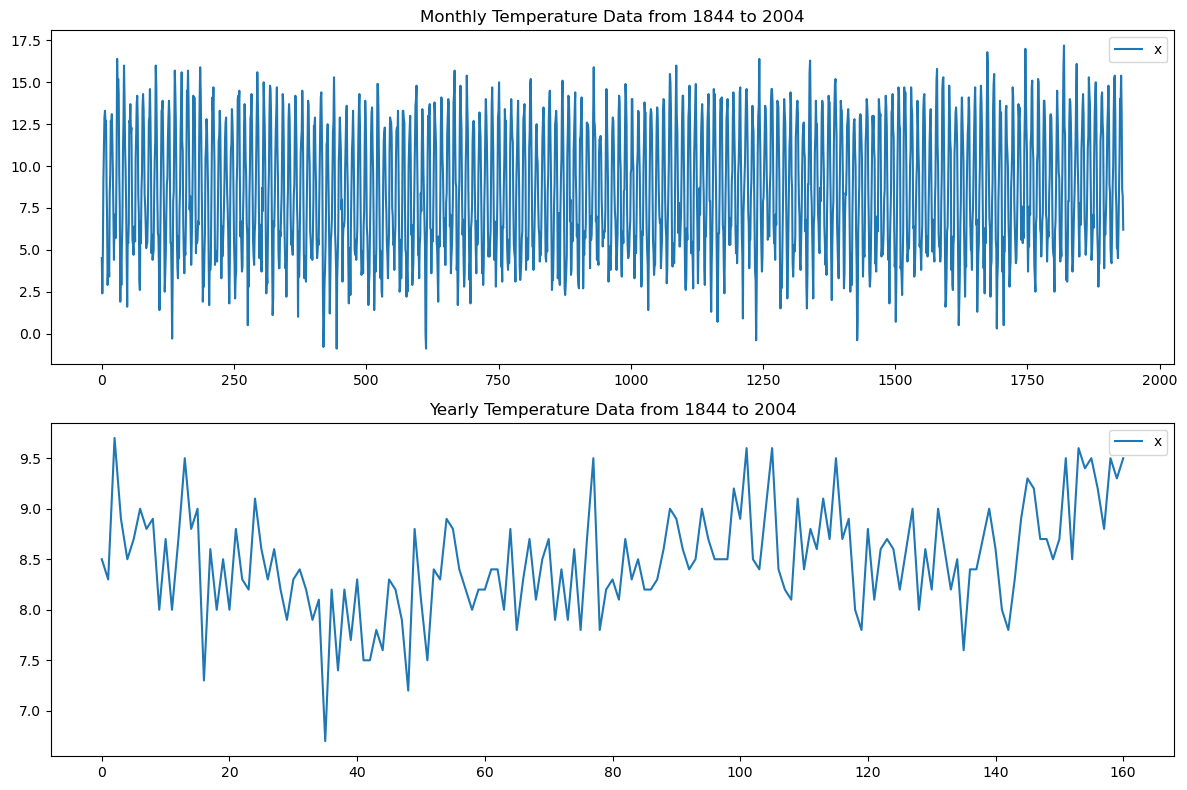

In [7]:
#VISUALISATION

# Visualising the loaded data
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# visualisation of monthly data
monthly_data.plot(ax=axes[0])
axes[0].set_title("Monthly Temperature Data from 1844 to 2004")

# visualisation of yearly data
yearly_data.plot(ax=axes[1])
axes[1].set_title("Yearly Temperature Data from 1844 to 2004")
plt.tight_layout()
plt.show()  

In [8]:
# 1.Exponential Smoothing: - Holt-Winters Exponential Smoothing modeling

from statsmodels.tsa.holtwinters import ExponentialSmoothing 
# used for implementing Holt-Winters Exponential Smoothing. 

In [9]:
# Fit Holt-Winters model to monthly data
monthly_model = ExponentialSmoothing(monthly_data, trend="add", seasonal="add", seasonal_periods=12)
monthly_fit = monthly_model.fit()

# Fit Holt-Winters model to yearly data
yearly_model = ExponentialSmoothing(yearly_data, trend="add", seasonal="add", seasonal_periods=12)
yearly_fit = yearly_model.fit() 

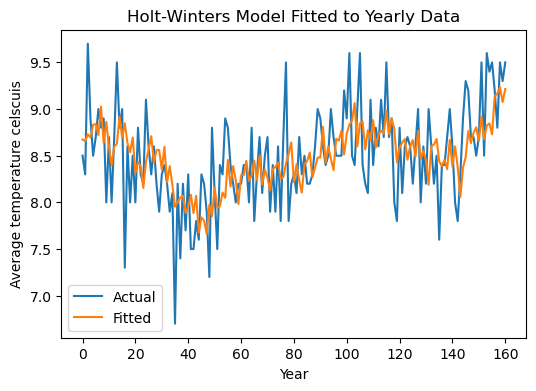

In [15]:
#First we try to Fit Holt-Winters model to yearly data
yearly_model = ExponentialSmoothing(yearly_data, trend="add", seasonal="add", seasonal_periods=12)
yearly_fit = yearly_model.fit()

# Get fitted values
yearly_fit = yearly_fit.fittedvalues

# Plot actual and fitted values
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(yearly_data.index, yearly_data, label='Actual')
ax.plot(yearly_fit.index, yearly_fit, label='Fitted')
ax.set_title('Holt-Winters Model Fitted to Yearly Data')
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature celscuis')
ax.legend()
plt.show() 

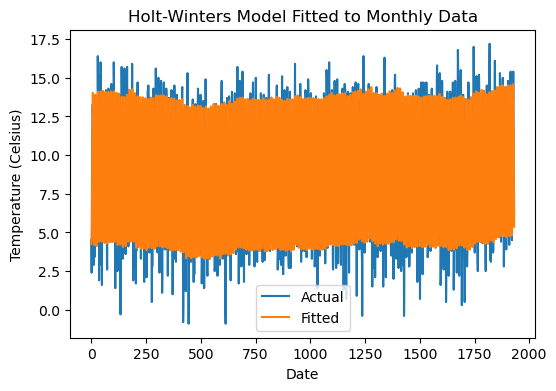

In [17]:
# Plot monthly data
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(monthly_data.index, monthly_data, label='Actual')
ax.plot(monthly_fit.fittedvalues.index, monthly_fit.fittedvalues, label='Fitted')
ax.set_title('Holt-Winters Model Fitted to Monthly Data')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Celsius)')
ax.legend()
plt.show()


In [11]:
# 2.ARIMA AND SARIMA MODELING

from pmdarima.arima import auto_arima
# used for automatically selecting the optimal parameters (order) for ARIMA and SARIMA models 

In [12]:
print(yearly_data.columns)# Fit ARIMA model to monthly data
monthly_arima_model = auto_arima(monthly_data, seasonal=True, m=12)
monthly_arima_fit = monthly_arima_model.fit(monthly_data)

# Fit SARIMA model to yearly data
yearly_sarima_model = auto_arima(yearly_data, seasonal=True, m=1)
yearly_sarima_fit = yearly_sarima_model.fit(yearly_data) 

Index(['x'], dtype='object')


C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, sel

In [13]:
print(monthly_arima_model.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1932
Model:             SARIMAX(3, 1, 1)x(2, 0, 1, 12)   Log Likelihood               -3184.380
Date:                            Fri, 12 May 2023   AIC                           6386.760
Time:                                    18:30:39   BIC                           6436.852
Sample:                                         0   HQIC                          6405.185
                                           - 1932                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.079e-05   3.44e-05     -0.896      0.370   -9.81e-05    3.66e-05
ar.L1          0.2396      0.021   

In [14]:
print(yearly_sarima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -103.885
Date:                Fri, 12 May 2023   AIC                            211.771
Time:                        18:30:44   BIC                            217.921
Sample:                             0   HQIC                           214.268
                                - 161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8238      0.053    -15.663      0.000      -0.927      -0.721
sigma2         0.2130      0.021     10.215      0.000       0.172       0.254
Ljung-Box (L1) (Q):                   0.19   Jarque-

In [15]:
#v 3. Simple Time Series Models: Simple naive method

print(yearly_data.columns) 

Index(['x'], dtype='object')


In [16]:
print(monthly_data.columns)

Index(['x'], dtype='object')


In [17]:
# Naive method for monthly data
monthly_naive = monthly_data["x"].shift(1)

# Naive method for yearly data
yearly_naive = yearly_data["x"].shift(1)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Split data into training and test sets
monthly_train = monthly_data.loc[:len(monthly_data)-13, :]
monthly_test = monthly_data.loc[len(monthly_data)-12:, :]

yearly_train = yearly_data.loc[:len(yearly_data)-2, :]
yearly_test = yearly_data.loc[len(yearly_data)-1:, :] 


In [19]:
# Forecast monthly temperature using Holt-Winters model
monthly_model = ExponentialSmoothing(monthly_train, trend="add", seasonal="add", seasonal_periods=12)
monthly_fit = monthly_model.fit()
monthly_forecast = monthly_fit.forecast(12)

# Forecast yearly temperature using ARIMA model
yearly_model = auto_arima(yearly_train, seasonal=True, m=1)
yearly_fit = yearly_model.fit(yearly_train)
yearly_forecast = yearly_fit.predict(n_periods=1)


In [24]:
# Evaluate forecasts against actual data for 2004

# Calculate mean squared error (MSE) for the monthly, yearly forecast
monthly_mse = mean_squared_error(monthly_test, monthly_forecast)
yearly_mse = mean_squared_error(yearly_test, yearly_forecast)

# Calculate root mean squared error (RMSE) for the monthly, yearly forecast
monthly_rmse = np.sqrt(monthly_mse)
yearly_rmse = np.sqrt(yearly_mse)

# Calculate R-squared (coefficient of determination) for the monthly,yearly forecast
monthly_r2 = r2_score(monthly_test, monthly_forecast)
yearly_r2 = r2_score(yearly_test, yearly_forecast)

## Calculate mean absolute percentage error (MAPE) for the monthly, yearly forecast
monthly_mape = np.mean(np.abs((monthly_test - monthly_forecast) / monthly_test)) * 100
yearly_mape = np.mean(np.abs((yearly_test - yearly_forecast) / yearly_test)) * 100

print("Monthly temperature forecast for 2004: ")
print(monthly_forecast)
print("Yearly temperature forecast for 2004: ")
print(yearly_forecast)
print("MSE for monthly forecast: ", monthly_mse)
print("MSE for yearly forecast: ", yearly_mse)
print("RMSE for monthly forecast: ", monthly_rmse)
print("RMSE for yearly forecast: ", yearly_rmse)
print("R-squared for monthly forecast: ", monthly_r2)
print("R-squared for yearly forecast: ", yearly_r2)
print("Mean Absolute Percentage Error (MAPE) for monthly forecast: ", monthly_mape)
print("Mean Absolute Percentage Error (MAPE) for yearly forecast: ", yearly_mape) 


Monthly temperature forecast for 2004: 
1920     4.794754
1921     4.987259
1922     5.913504
1923     7.907258
1924    10.498506
1925    13.187883
1926    14.547880
1927    14.509760
1928    12.664759
1929     9.818506
1930     6.822878
1931     5.308508
dtype: float64
Yearly temperature forecast for 2004: 
160    9.154547
dtype: float64
MSE for monthly forecast:  0.618376945658552
MSE for yearly forecast:  0.11933762312431637
RMSE for monthly forecast:  0.7863694714690748
RMSE for yearly forecast:  0.3454527798763767
R-squared for monthly forecast:  0.9527595916227233
R-squared for yearly forecast:  nan
Mean Absolute Percentage Error (MAPE) for monthly forecast:  1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
1925   NaN
1926   NaN
1927   NaN
1928   NaN
1929   NaN
1930   NaN
1931   NaN
x      NaN
dtype: float64
Mean Absolute Percentage Error (MAPE) for yearly forecast:  160   NaN
x     NaN
dtype: float64


C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\aksha\PERSONAL\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


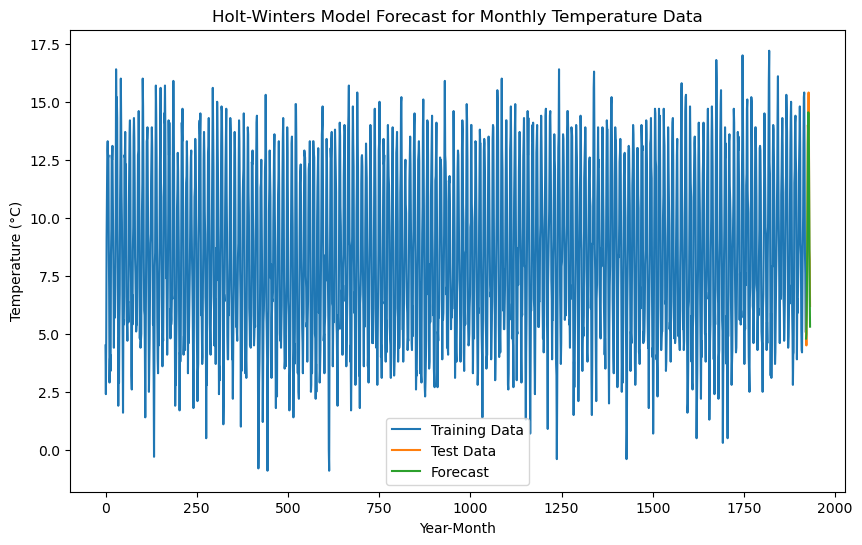

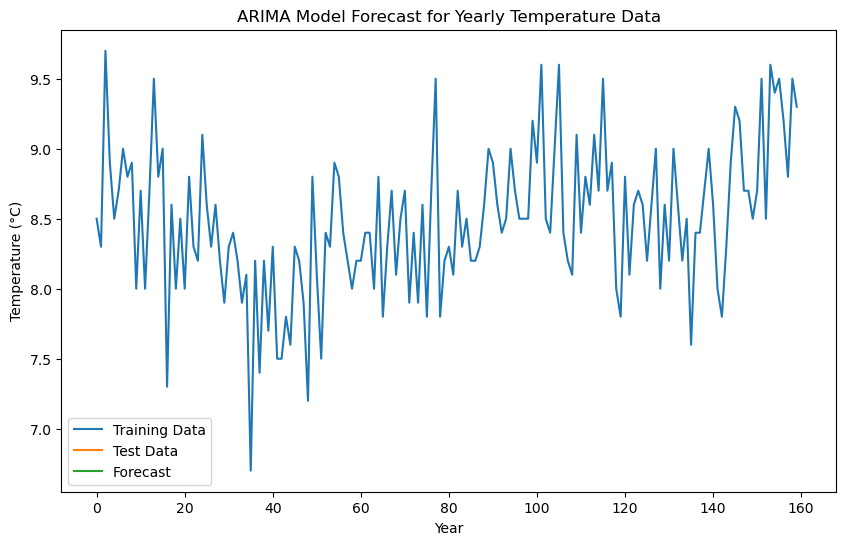

In [21]:
# Plot monthly temperature forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_train.index, monthly_train, label='Training Data')
ax.plot(monthly_test.index, monthly_test, label='Test Data')
ax.plot(monthly_forecast.index, monthly_forecast, label='Forecast')
ax.set_title('Holt-Winters Model Forecast for Monthly Temperature Data')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Temperature (°C)')
ax.legend()

# Plot yearly temperature forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(yearly_train.index, yearly_train, label='Training Data')
ax.plot(yearly_test.index, yearly_test, label='Test Data')
ax.plot(yearly_test.index, yearly_forecast, label='Forecast')
ax.set_title('ARIMA Model Forecast for Yearly Temperature Data')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.legend()
